## Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

## importing dataset

In [2]:
data = pd.read_csv('HRDataset-v144.csv')

In [38]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,PerformanceScore
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,4.60,5,0,1/17/2019,0,1,0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,4.96,3,6,2/24/2016,0,17,1
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,3.02,3,0,5/15/2012,0,3,1
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,4.84,5,0,01/03/2019,0,15,1
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,5.00,4,0,02/01/2016,0,2,1


In [5]:
data.keys()

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences',
       'PerformanceScore'],
      dtype='object')

## Data preprocessing

In [5]:
data.drop(['FromDiversityJobFairID','Salary','PositionID','Position','State','Zip','DOB','Sex','MaritalDesc','DateofHire','DateofTermination','TermReason','Department','ManagerName','Employee_Name','ManagerID','RecruitmentSource','EngagementSurvey','SpecialProjectsCount','DaysLateLast30','Absences','CitizenDesc','HispanicLatino','RaceDesc','LastPerformanceReview_Date'],axis=1,inplace= True)

## Importing PCA

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
scaler.fit(data)

StandardScaler()

In [8]:
scaled_data=scaler.transform(data)

In [9]:
scaled_data

array([[-1.44802424, -0.81431051, -0.86043416, ...,  0.66186312,
         1.22202203, -1.89037811],
       [-0.80198265,  1.22803278,  0.20145086, ..., -1.05346547,
        -0.98115972,  0.5289947 ],
       [ 0.44554592,  1.22803278,  0.20145086, ..., -1.05346547,
        -0.98115972,  0.5289947 ],
       ...,
       [-1.62624261, -0.81431051, -0.86043416, ...,  0.66186312,
         1.22202203, -1.89037811],
       [-1.25866722, -0.81431051, -0.86043416, ...,  0.66186312,
        -0.98115972,  0.5289947 ],
       [ 1.28094452, -0.81431051,  3.38710591, ...,  0.66186312,
         1.22202203,  0.5289947 ]])

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA(n_components=2)

In [12]:
pca.fit(scaled_data)

PCA(n_components=2)

In [13]:
x_pca=pca.transform(scaled_data)

In [48]:
scaled_data.shape

(311, 11)

Text(0, 0.5, 'Second pronciple component')

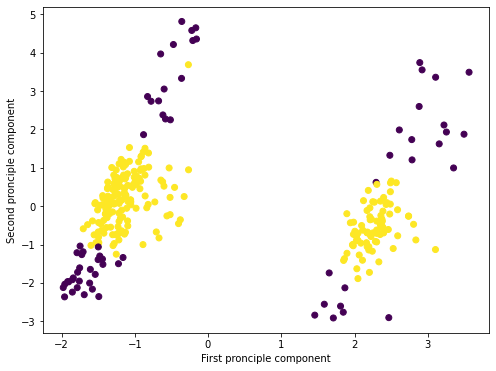

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['PerformanceScore'])
plt.xlabel('First pronciple component')
plt.ylabel('Second pronciple component')

## Data splitting

In [14]:
y = data['PerformanceScore']   #target column
X = x_pca                      #optimized dataset

In [122]:
#y = data['PerformanceScore']
#X = data.drop(['PerformanceScore'],axis =1)

## Importing Decision Tree Libraries

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 100)

## Training of model

In [124]:
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 100)
dtmodel.fit(X_train, y_train)

dt_pred = dtmodel.predict(X_test)


## Importing Evaluation Metric Libraries

In [125]:
from sklearn.metrics import confusion_matrix
conf_mat_dtmodel = confusion_matrix(y_test,dt_pred)

## Confusion Matrix

Text(69.0, 0.5, 'true data')

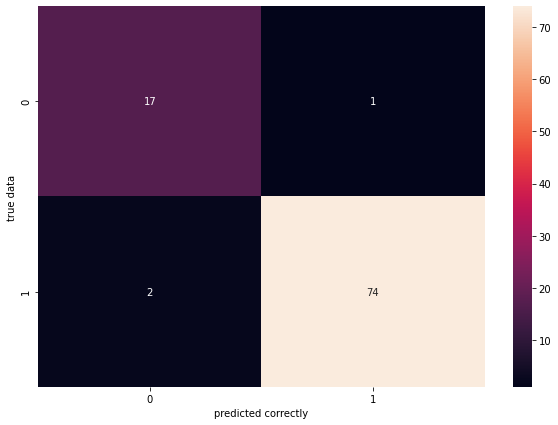

In [126]:
cm=conf_mat_dtmodel
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted correctly')
plt.ylabel('true data')

In [21]:
TruePositive_dtA=2
TruePositive_dtB=4
TruePositive_dtC=75
TruePositive_dtD=11
totalFalsePositive_dtA=1
totalFalsePositive_dtB=0
totalFalsePositive_dtC=0
totalFalsePositive_dtD=1
totalFalseNegative_dtA=0
totalFalseNegative_dtB=0
totalFalseNegative_dtC=1
totalFalseNegative_dtD=0
TrueNegative_dt=11

## Accuracy

In [56]:
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)
dt_accuracy

96.81

## Precision

In [23]:
Precision_dtA= TruePositive_dtA/(TruePositive_dtA+totalFalsePositive_dtA)
p_dtA=round(Precision_dtA,2)

Precision_dtB= TruePositive_dtB/(TruePositive_dtB+totalFalsePositive_dtB)
p_dtB=round(Precision_dtB,2)

Precision_dtC= TruePositive_dtC/(TruePositive_dtC+totalFalsePositive_dtC)

p_dtC=round(Precision_dtC,2)

Precision_dtD= TruePositive_dtD/(TruePositive_dtD+totalFalsePositive_dtD)
p_dtD=round(Precision_dtD,2)

Precision=Precision_dtA+Precision_dtB+Precision_dtC+Precision_dtD
Pre=Precision/4
Pre_Final=round(Pre,2)
print(Pre_Final*100)

90.0


## Recall/Sensitivity

In [24]:
Recall_dtA= TruePositive_dtA/(TruePositive_dtA+totalFalseNegative_dtA)
r_dtA=round(Recall_dtA,2)

Recall_dtB= TruePositive_dtB/(TruePositive_dtB+totalFalseNegative_dtB)
r_dtB=round(Recall_dtB,2)

Recall_dtC= TruePositive_dtC/(TruePositive_dtC+totalFalseNegative_dtC)
r_dtC=round(Recall_dtC,2)

Recall_dtD= TruePositive_dtD/(TruePositive_dtD+totalFalseNegative_dtD)
r_dtD=round(Recall_dtD,2)

Recall=Recall_dtA+Recall_dtB+Recall_dtC+Recall_dtD
Re=Recall/4
Re_Final=round(Re,2)
print(Re_Final*100)

100.0


## ANN

### Importing Python Libraries

In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

## Importing dataset

In [83]:
data = pd.read_csv('HRDataset-v144.csv')

In [84]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,PerformanceScore
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,4.60,5,0,1/17/2019,0,1,0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,4.96,3,6,2/24/2016,0,17,1
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,3.02,3,0,5/15/2012,0,3,1
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,4.84,5,0,01/03/2019,0,15,1
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,5.00,4,0,02/01/2016,0,2,1


## Data Splitting

In [85]:
train,test=train_test_split(data, random_state=100)
X_train=train[train.columns[1:10]]
y_train=train['PerformanceScore']
X_test= test[test.columns[1:10]]
y_test= test['PerformanceScore']

In [86]:
y = data['PerformanceScore']
X = data.drop(['PerformanceScore'],axis =1)

## Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Building Neural Network Topology

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
MLP =MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
MLP.fit(X_train,y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [89]:
predictions=MLP.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Confusion Matrix

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat_dtmodel=(confusion_matrix(y_test,predictions))


Text(69.0, 0.5, 'truth')

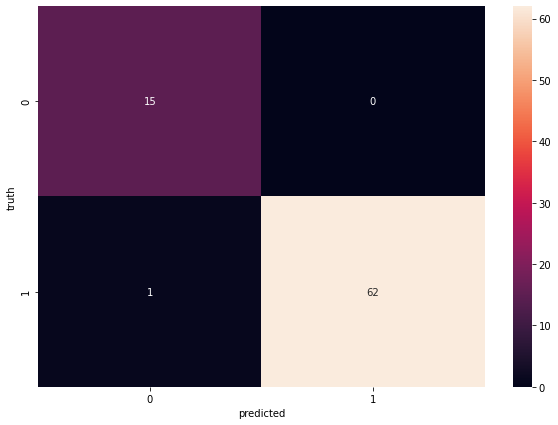

In [91]:
cm=conf_mat_dtmodel
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

## Evaluation of Metrics

In [95]:
TruePositive_ann=15
FalsePositive_ann=0
FalseNegative_ann=1
TrueNegative_ann=62

## Accuracy

In [96]:
ann_accuracy = round(metrics.accuracy_score(y_test, predictions) * 100, 2)
ann_accuracy

98.72

## Precision

In [118]:
Precision_ann= TruePositive_ann/(TruePositive_ann+FalsePositive_ann)
p_ann=round(Precision_ann,2)*100

print(p_ann)

100.0


## Recall/Sensitivity

In [117]:
Recall_ann= TruePositive_ann/(TruePositive_ann+FalseNegative_ann)
r_ann=round(Recall_ann,2)*100

print(r_ann)

94.0


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfmodel.fit(X_train, y_train)

rf_pred =rfmodel.predict(X_test)


In [18]:
from sklearn.metrics import confusion_matrix
conf_mat_rfmodel = confusion_matrix(y_test,rf_pred)
from sklearn import metrics
conf_mat_rfmodel

array([[18,  0],
       [ 2, 74]], dtype=int64)

Text(69.0, 0.5, 'truth')

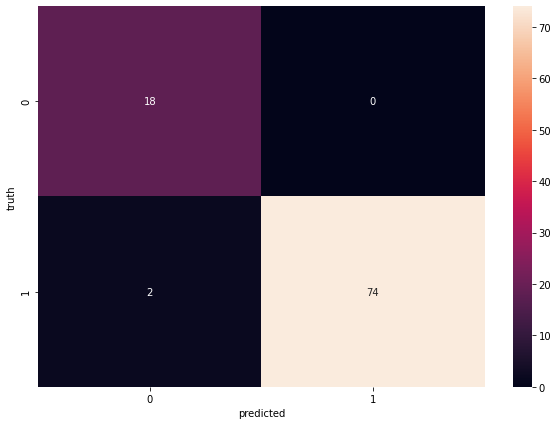

In [19]:
cm=conf_mat_rfmodel
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [22]:
TruePositive_rf=18
FalsePositive_rf=0
FalseNegative_rf=2
TrueNegative_rf=74

In [20]:
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)
rf_accuracy

97.87

In [23]:
Precision_rf= TruePositive_rf/(TruePositive_rf+FalsePositive_rf)
p_rf=round(Precision_rf,2)*100
print(p_rf)

100.0


In [24]:
Recall_rf=  TruePositive_rf/(TruePositive_rf+FalseNegative_rf)
R_rf=round(Recall_rf * 100,1)
print(R_rf)

90.0


In [25]:
F1_score_rf= 2 *((Precision_rf*Recall_rf)/(Precision_rf+Recall_rf))
F1_rf=round(F1_score_rf*100,1)
print(F1_rf)

94.7


In [26]:
Specificity_rf=TrueNegative_rf/(FalsePositive_rf+TrueNegative_rf)
Specificity_rf=round(Specificity_rf*100,1)
print(Specificity_rf)

100.0
